## HW Assignment 2 for DSMCER


### Part 1 - Basic Data Visualization 

#### Plotting x-y data


**1a)** Use the HCEPDB file you have downloaded with your `setup.sh` script from SEDS-HW1. Create a single 2x2 composite plot (*not 4 separate figures*).  The plots should contain the following data
* Upper-left: PCE vs VOC 
* Upper-right: PCE vs JCS 
* Lower-left: E_HOMO vs VOC
* Lower-right: E_LUMO vs PCE 

**Note well:** You should make the plots the **highest quality possible** and, in your judgement, **ready for inclusion in a formal report or publication**. Ensure that you follow the criteria of readability, audience and showmanship as was discussed in class. You should choose the type of plot which best represents your data.

**1b)** Create a markdown cell after your plot and add the following information 
* The five terms PCE, VOC, JCS, E_HOMO and E_LUMO defined above and listed in the HCEPDB relate to photovoltaic materials - define them as they pertain to molecules that could be used for energy conversion applications. 
    
* Briefly explain the changes you made from the default plot and why you made them. 


    


In [1]:
# Import necessary libraries 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.interpolate

In [2]:
# Load HCEPDB database into pandas dataframe
df = pd.read_csv('/Users/kmosko/direct/HCEPDB/HCEPDB_moldata.csv')

Text(0.5, 1.0, 'Bivariate density plot Energy of LUMO vs PCE')

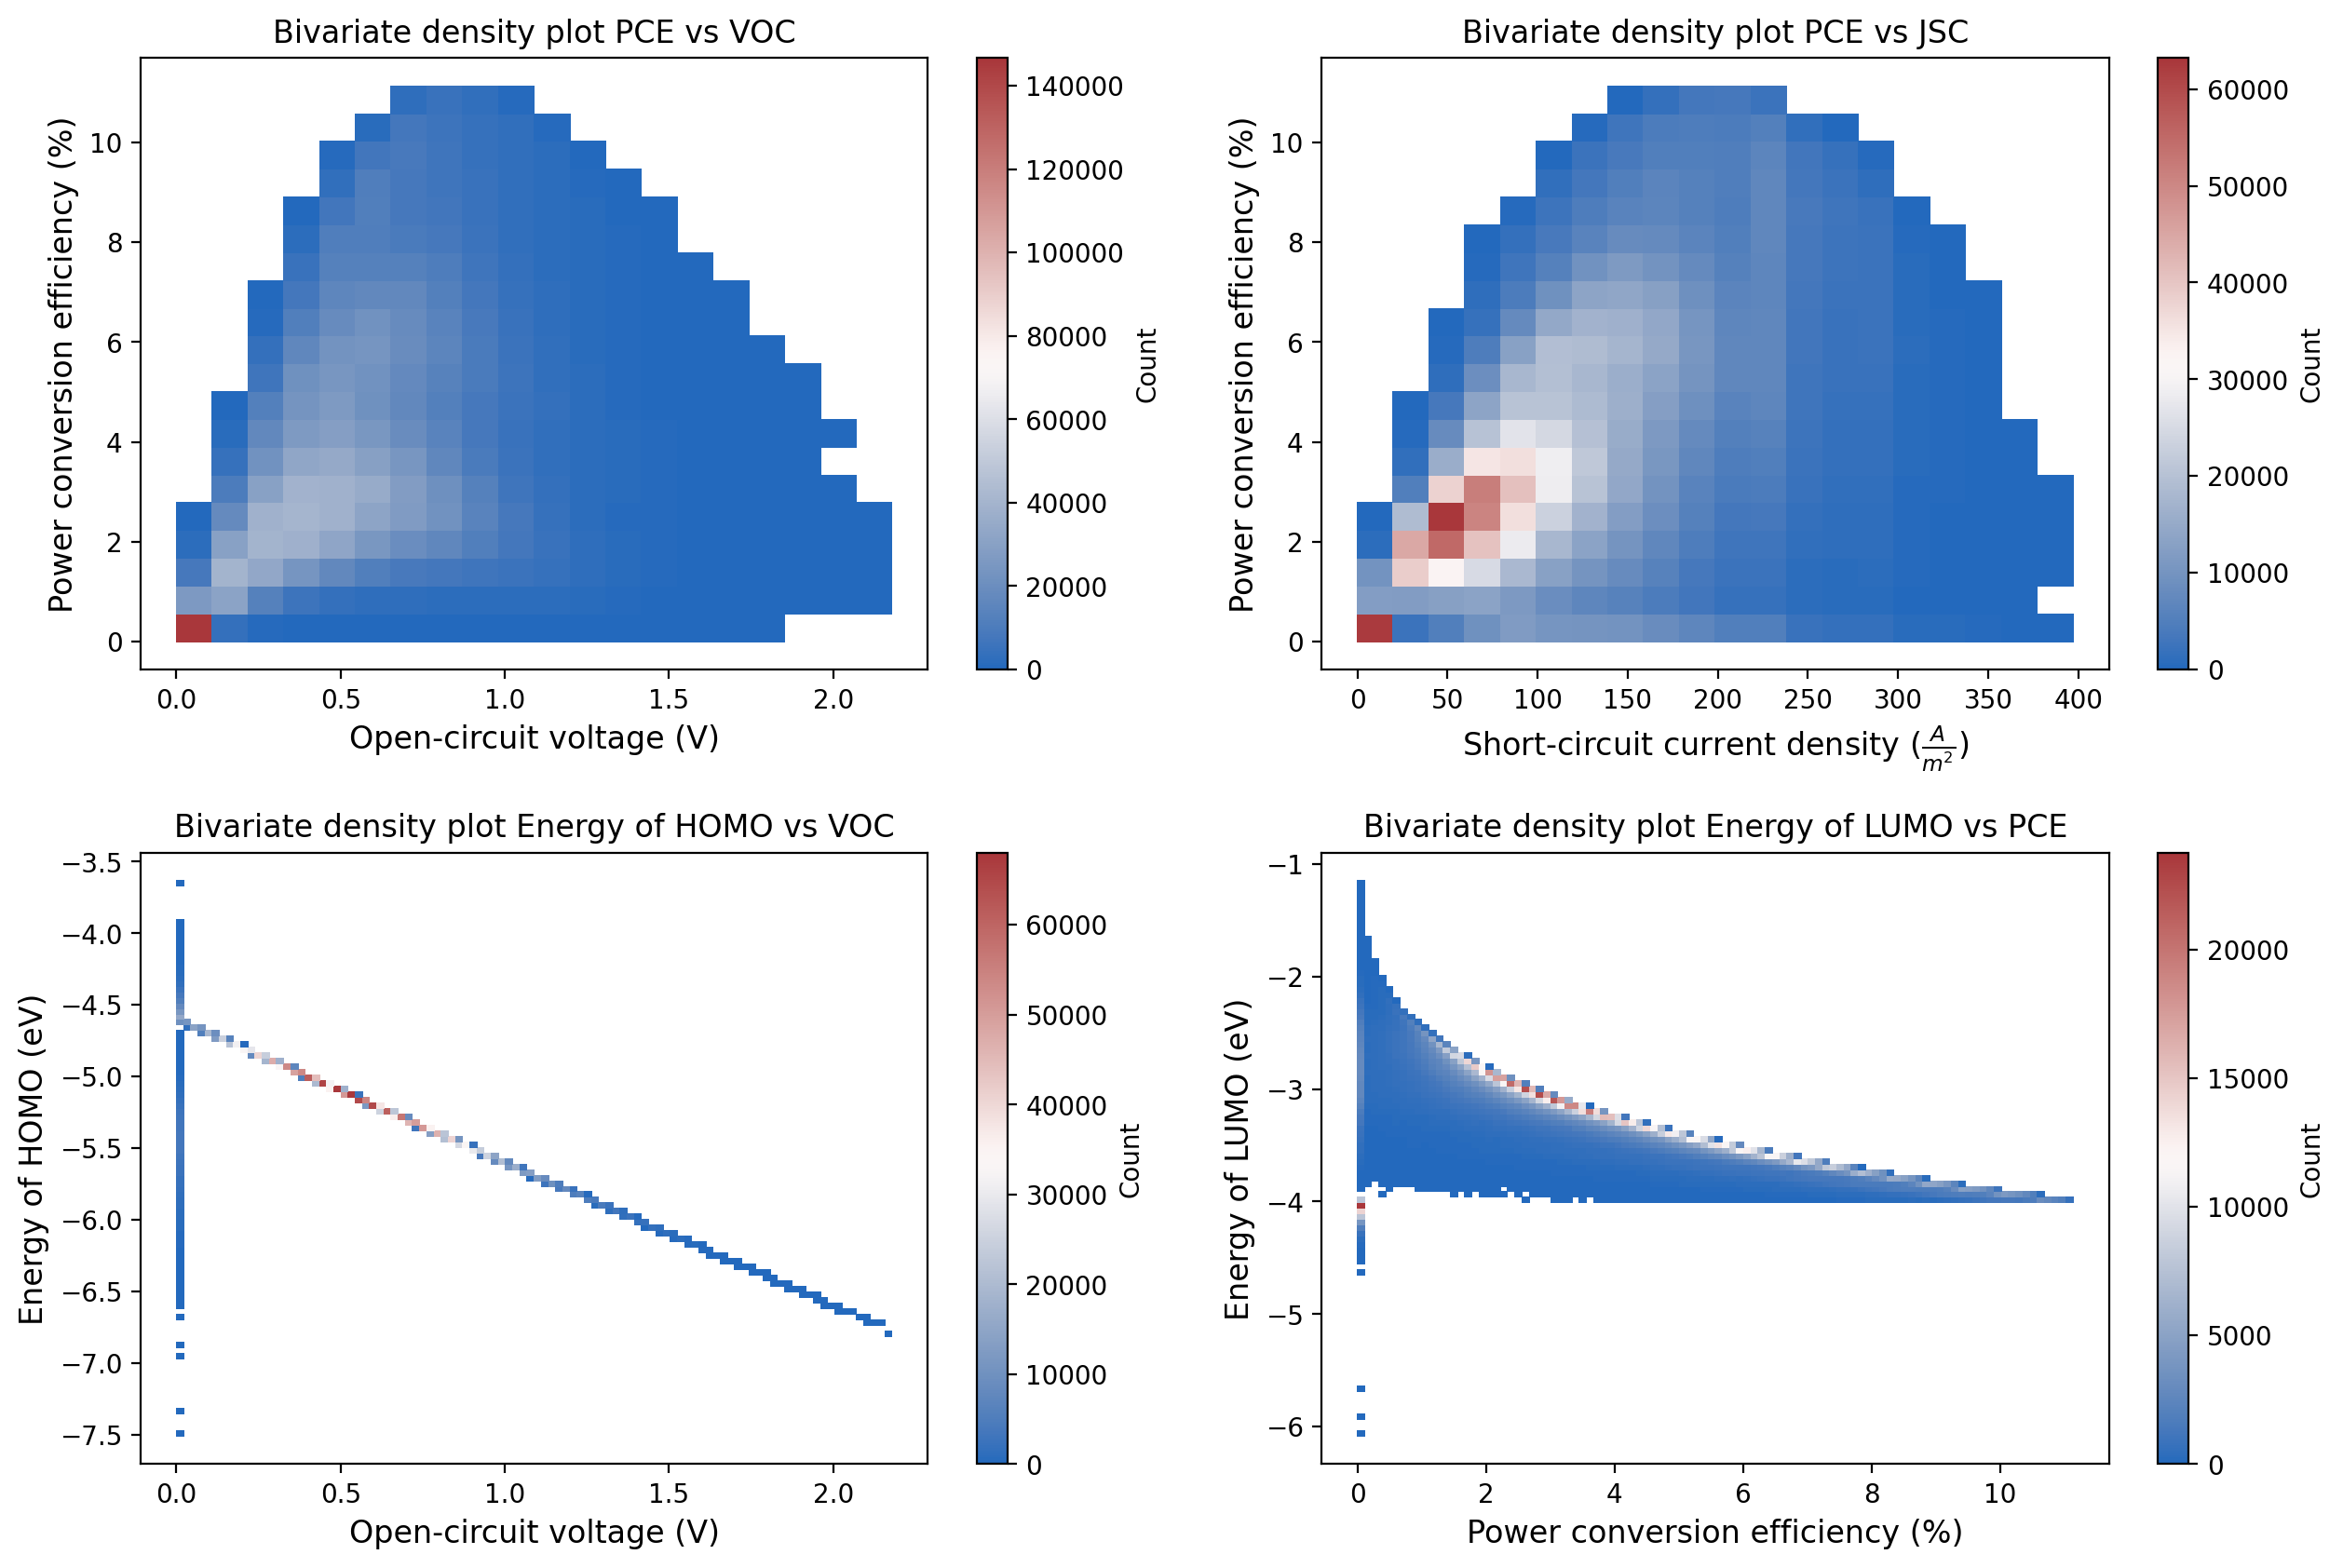

In [3]:
# Plotting for part 1a
fig, axes = plt.subplots(figsize = (15,10), nrows =2, ncols=2, dpi=200)
fig.subplots_adjust(hspace=.3)

sns.histplot(df, x='voc', y='pce', bins=20, cmap = 'vlag', cbar=True, cbar_kws = {'label': 'Count'}, ax=axes[0,0])
axes[0,0].set_xlabel('Open-circuit voltage (V)', fontsize=12)
axes[0,0].set_ylabel('Power conversion efficiency (%)', fontsize=12)
axes[0,0].set_title('Bivariate density plot PCE vs VOC', fontsize=12)

sns.histplot(df, x='jsc', y='pce', bins=20, cmap = 'vlag', cbar=True, cbar_kws = {'label': 'Count'}, ax=axes[0,1])
axes[0,1].set_xlabel('Short-circuit current density $(\\frac{A}{m^2})$', fontsize=12)
axes[0,1].set_ylabel('Power conversion efficiency (%)', fontsize=12)
axes[0,1].set_title('Bivariate density plot PCE vs JSC', fontsize=12)

sns.histplot(df, x='voc', y='e_homo_alpha', bins=100, cmap = 'vlag', cbar=True, cbar_kws = {'label': 'Count'}, ax=axes[1,0])
axes[1,0].set_xlabel('Open-circuit voltage (V)', fontsize=12)
axes[1,0].set_ylabel('Energy of HOMO (eV)', fontsize=12)
axes[1,0].set_title('Bivariate density plot Energy of HOMO vs VOC', fontsize=12)

sns.histplot(df, x='pce', y='e_lumo_alpha', bins=100, cmap = 'vlag', cbar=True, cbar_kws = {'label': 'Count'}, ax=axes[1,1])
axes[1,1].set_xlabel('Power conversion efficiency (%)', fontsize=12)
axes[1,1].set_ylabel('Energy of LUMO (eV)', fontsize=12)
axes[1,1].set_title('Bivariate density plot Energy of LUMO vs PCE', fontsize=12)



**Term definitions:**
* Power conversion efficiency (PCE): The fraction of power input to the photovoltaic material that is converted to usable electric power. This quantity is expressed as a percentage % 
* Open-circuit voltage (VOC): The voltage output from the photovoltaic material when the current across it is 0. This quantity is typically expressed in volts (V)
* Short-circuit current density (JSC): The current across the photovoltaic material per unit area when the voltage across it is 0. This quanity is typically expressed in $(\frac{A}{m^2})$
* Energy of the highest occupied molecular orbital (E_HOMO): The energy of the highest occupied molecular orbital in the photovoltaic material. This quantity is typically expressed in electron volts (eV)
* Energy of the lowest unoccupied molecular orbital (E_LUMO): The energy of the lowest unoccupied molecular orbital in the photovoltaic material. This quantity is typically expressed in electron volts (eV)

*Note: When photovoltaic material is mentioned in the definitions above, it refers to a material made solely from x molecule listed in the HCEPDB database.*

**Plot reasoning:** 

Choosing the best representation for the HCEPDB data was tough for me. I made the plot's above under the assumption you wanted *all* of the data plotted and not just a sample of it. Since we are dealing with bivariate data (two variables of interest), it made sense to make a scatter plot; however, the dataset is very large, and you lose alot of the useful detail with a normal scatterplot, so I tried including some density information. Originally, I tried ploting a seaborns bivariate KDE plot, but this took very long to compute for such a large dataset (I actually couldn't get it to finish), and I instead settled on the 2-dimensional histograms to generate a heat map of the data. While this wasn't ideal (I like the contour plots better), it was the best balance of useful and computationally efficient.  

### Part 2: Contour plots of a free energy surface

Use the `ALA2fes.dat` file to create a contour plot of the alanine dipeptide $\Phi$ vs $\Psi$ free-energy surface. 

Guidelines and information: 
   * The energy scale in the data input file is on kJ/mol and the free-energy surface (FES) was collected at a temperature of 300K.
   * You should create a contour plot that draws contour lines spaced every kT in energy and stops drawing contours once all of the features can be clearly seen. 
   * Annotate the cell so I can follow all the steps you are doing. The final energy plot need not be in kJ/mol (you can convert it to other energy or use units of kT if you prefer.
   * Make sure to have titles, axis labels, something that denotes the value of the contours.
   * Optional but encouraged, use greek letters for the axes labels.
   * Note: only the first three columns of the `ALA2fes.dat` file are relevant. The first two columns are the $\Psi$ and $\Phi$ coordinates, respectively. The free.file column is the free energy data. Ignore the last two columns.

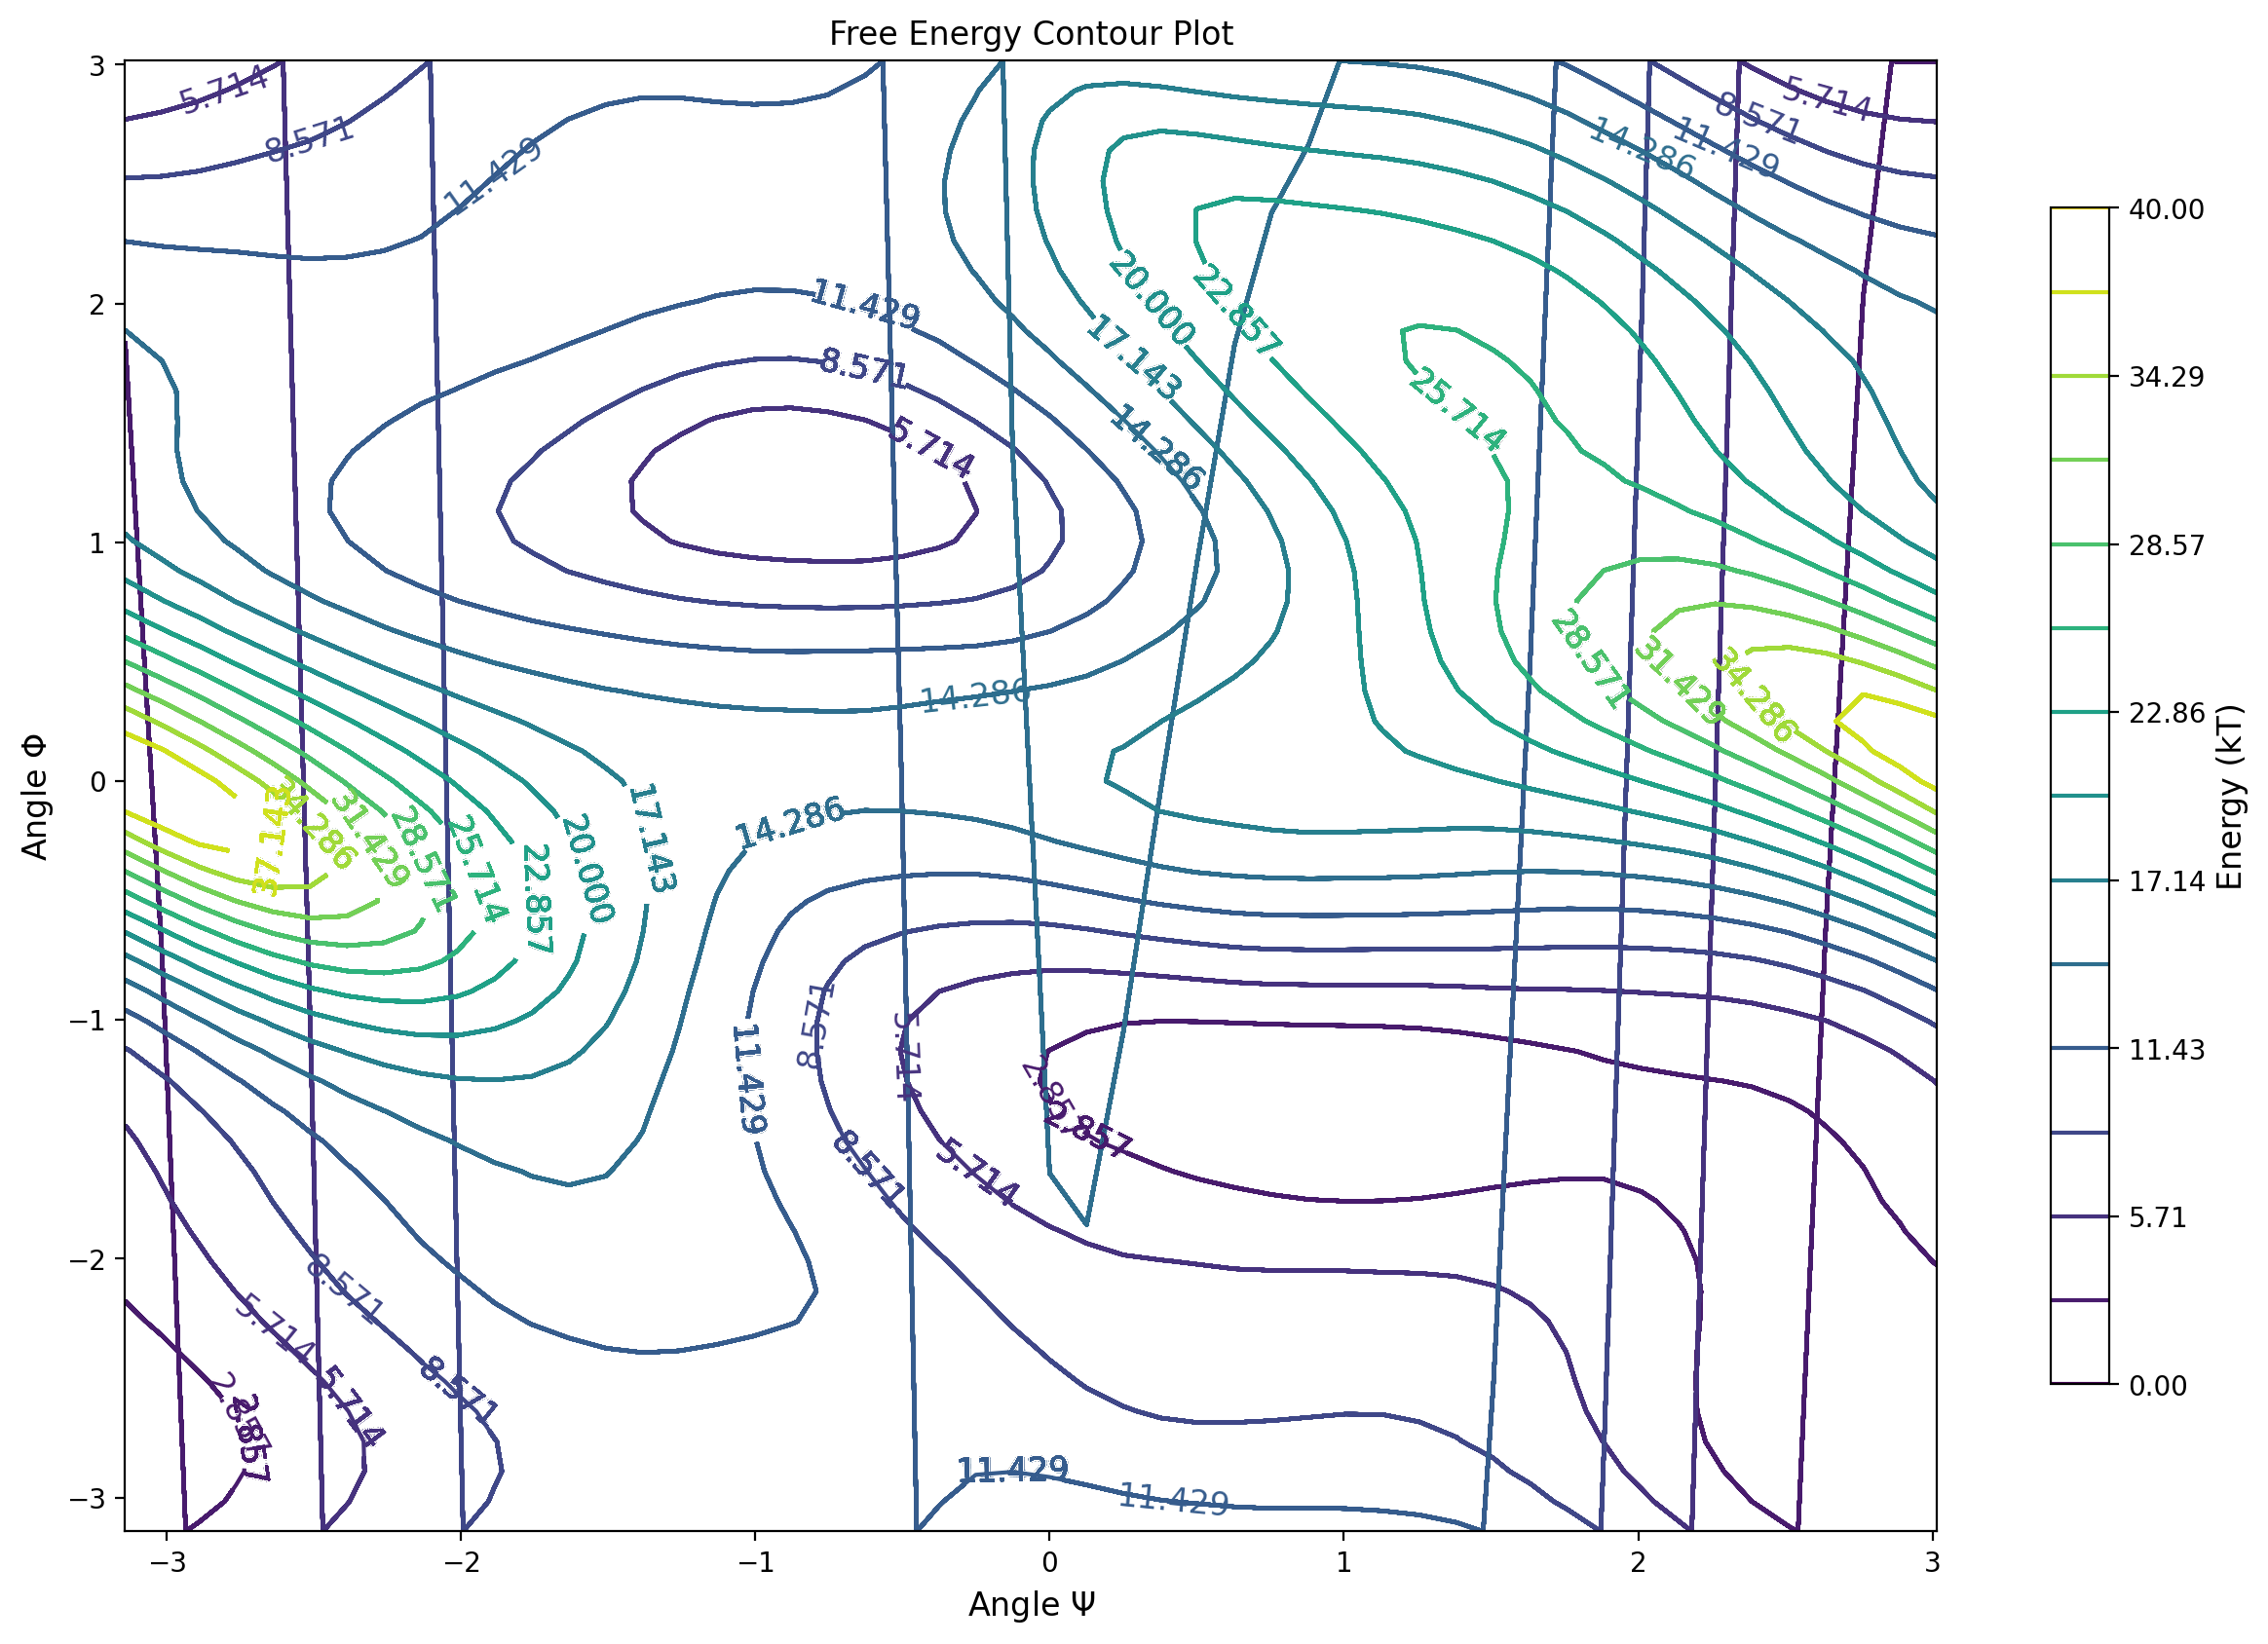

In [4]:
# Load .dat file into pandas dataframe
df1 = pd.read_table("ALA2fes.dat", skip_blank_lines=True, delim_whitespace=True)
df1['file.free'] = df1['file.free']/2.476 #Conversion from kJ/mol -> kT

# Define table columns as arrays to plot
x = np.array(df1['psi'])
y = np.array(df1['phi'])
z = np.array(df1['file.free'])

# Create 2-D meshgrid of x and y values
X, Y = np.meshgrid(x,y)

# Linearly interplotate free energy values (z variable) onto (x,y) meshgrid
Z = scipy.interpolate.griddata((x,y), z, (X, Y), method = 'linear')

# Specify contour plot levels (15 levels chosen to capture detail)
levels = list(np.linspace(0,40,15))

# Plot contour's
fig = plt.figure(figsize=(15,10), dpi=200)
ax = fig.add_subplot()
CS = ax.contour(X, Y, Z, levels)
ax.clabel(CS, inline=1, fontsize=12)
ax.set_xlabel('Angle $\Psi$', fontsize=12)
ax.set_ylabel('Angle $\Phi$', fontsize=12)
ax.set_title('Free Energy Contour Plot', fontsize=12)

# Make a colorbar for the contour lines and label
CB = fig.colorbar(CS, shrink=0.8)
CB.set_label('Energy (kT)',fontsize=12)

**Note:** I changed the .dat file slightly to make it easier to import into a pandas dataframe (just removed some of the commented sections). I also assumed the field label order in the data file was correct (column ordering of Phi, Psi, file.free) even though it contradicted the column ordering mentioned in the markdown text of the problem.  I had some discontinuties in the contour plot above due to the arrangment of the data in the .dat file. The second column of the data in the file is constant while varying the first, so it seems like you are bound to get some straight lines in the plot. 

### Part 3 - Combining visualization with descriptive statistics

**3a)** Create a plot of the energy gap E_LUMO - E_HOMO which shows the distribution of the gap values. On the same plot, show the estimated distribution which best follows the data using e.g. a kernel density estimate. Ensure that you have titles, axis labels and a legend.

**3b)** Compute the mean, median and variance of your distribution. Make sure to print the values. In a markdown cell after you have printed the values, comment on the value of the mean and standard deviation in comparison to the energy of a photon from the sun in the visible spectrum range - the photon's energy is 2.17 eV.

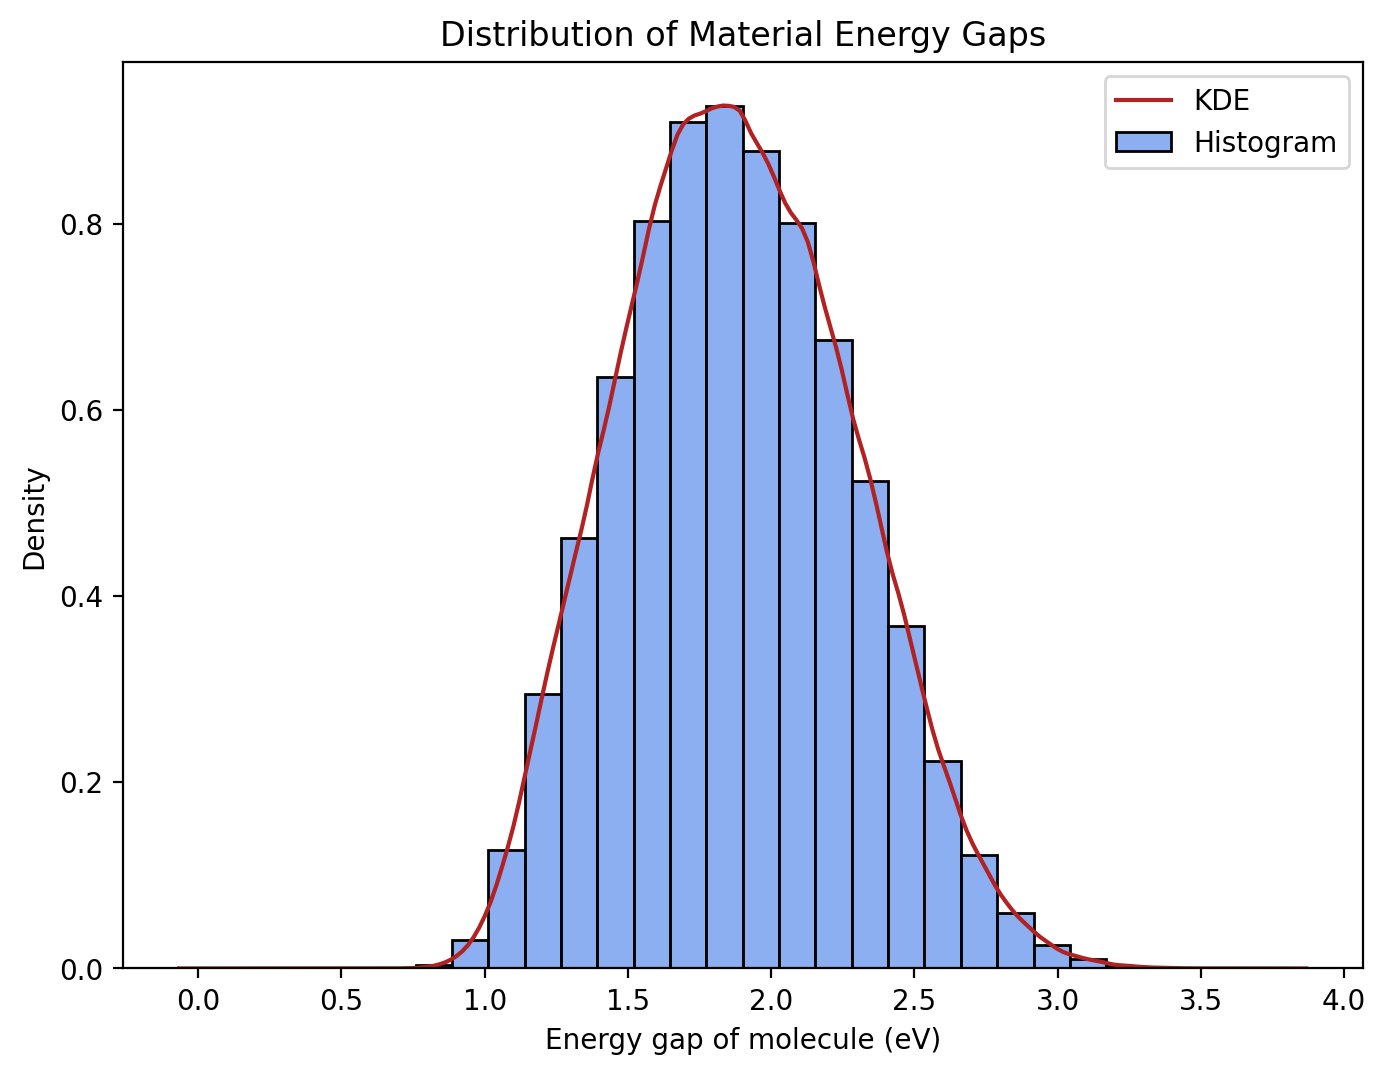

In [5]:
# Part 3a plotting
fig, axes = plt.subplots(figsize = (8,6), dpi=200)
sns.histplot(data = df,x='e_gap_alpha', bins= 30, color='cornflowerblue', stat='density', ax=axes)
sns.kdeplot(data = df, x='e_gap_alpha', color='firebrick', ax=axes)
axes.set_xlabel('Energy gap of molecule (eV)')
axes.set_ylabel('Density')
axes.set_title('Distribution of Material Energy Gaps')
axes.legend(labels=['KDE','Histogram'])

In [6]:
# Part 3b statistics calculations
mean = df['e_gap_alpha'].mean()
variance = df['e_gap_alpha'].var()
median = df['e_gap_alpha'].median()
stdev = np.sqrt(variance)

print('Mean:' + str(mean) + '  Variance:' + str(variance) + '  Median:' + str(median) + '  Standard dev:' + str(stdev))

Mean:1.8812132265662356  Variance:0.1602244907904706  Median:1.86629729214569  Standard dev:0.40028051512716756


We can see that the avg energy gap is 1.88 eV, which is less than the avg photon energy of 2.17 eV. I would assume you want the energy band gap of the solar cell to be equal to or less than that of the avg photo energy so that the avg photon can be absorbed by the material and excite an electron into the next energy level. The standard deviation of approximately 0.4 eV indicates that a majority of the molecules in the database (approximately 75% assuming a normal distribution) meet the above criteria (have an energy gap less than or equal to the avg photo energy of 2.17 eV). 